# standard opinf

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import torch
from sympy.utilities.iterables import multiset_permutations
import pickle

import time
tStart_notebook = time.time()

import sys
sys.path.insert(0, '../source')

from source.FomShallowIce import FomShallowIce
from source.PolyRomIntrusiveShallowIce import PolyRomIntrusiveShallowIce
from source.FoodReprojectionTime import FoodReprojectionTime
from source.FoodTime import FoodTime
import source.comparisons as testing
from source.ConstrainedOpInf import ConstrainedOpInf
from source.SnapshotTransformer import SnapshotTransformerExtension as SnapshotTransformer
from source.NestFire import NestFire

import opinf as opinf

import source.helpers_polyMat as polyMat

## user settings

## reduced space

In [2]:
with open('data/RB_slicer1', 'rb') as handle:
    [transformer, U_train, VR, nRB, slicer] = pickle.load(handle)

## Setup

In [3]:
fom = FomShallowIce(Lx=1000, 
                    Lz=1, 
                    orders=[511], 
                    bc_type="N", 
                    dt=1e-3, 
                    init_time=0, 
                    final_time=2)

U_dot = opinf.pre.ddt(U_train, fom.dt, order=2)

if transformer is None:
    U_dot_proj = VR.T @ U_dot
else:
    U_dot_proj = VR.T @ transformer.transform(U_dot)

U_proj = VR.T @ U_train

matrixhandler = FoodReprojectionTime(VR, fom, transformer=transformer)
matrixhandler.set_data(snapshots = [U_train], source = [U_dot_proj.T], slicer = 1)

## training

In [4]:
opinf_learning = NestFire(regularizer=None, matrixhandler=matrixhandler)

In [5]:
opinf_learning.grow()

regs:  [0. 0.] reconstruction:  0.0007113872315755109
regs:  [0.e+00 1.e-10] reconstruction:  0.0007113872315755109
regs:  [1.e-10 1.e-10] reconstruction:  0.0007113872315756243
regs:  [0.e+00 1.e-08] reconstruction:  0.0007113872315755109
regs:  [1.e-10 1.e-08] reconstruction:  0.0007113872315756243
regs:  [1.e-08 1.e-08] reconstruction:  0.0007113872315756243
regs:  [0.e+00 1.e-06] reconstruction:  0.0007113872315755109
regs:  [1.e-10 1.e-06] reconstruction:  0.0007113872315756243
regs:  [1.e-08 1.e-06] reconstruction:  0.0007113872315756243
regs:  [1.e-06 1.e-06] reconstruction:  0.0007113872315756243
regs:  [0.     0.0001] reconstruction:  0.0007113872315755109
regs:  [1.e-10 1.e-04] reconstruction:  0.0007113872315756243
regs:  [1.e-08 1.e-04] reconstruction:  0.0007113872315756243
regs:  [1.e-06 1.e-04] reconstruction:  0.0007113872315756243
regs:  [0.0001 0.0001] reconstruction:  0.0007113872315756243
regs:  [0.   0.01] reconstruction:  0.0007113872315755109
regs:  [1.e-10 1.e-0

regs:  [1.e-10 1.e-10] reconstruction:  0.000564435722694609
regs:  [0.e+00 1.e-10] reconstruction:  0.0005642548815083776
regs:  [1.e-10 1.e-09] reconstruction:  0.0005226690106394364
regs:  [1.e-09 1.e-09] reconstruction:  0.0005226811460031113
regs:  [0.e+00 1.e-09] reconstruction:  0.0005226790199188552
regs:  [1.e-10 1.e-08] reconstruction:  0.0005376653832724663
regs:  [1.e-09 1.e-08] reconstruction:  0.0005376653188028374
regs:  [1.e-08 1.e-08] reconstruction:  0.0005376656537138026
regs:  [0.e+00 1.e-08] reconstruction:  0.0005376622646662795
regs:  [1.e-10 1.e-07] reconstruction:  0.0005132857635471878
regs:  [1.e-09 1.e-07] reconstruction:  0.0005132855783453099
regs:  [1.e-08 1.e-07] reconstruction:  0.0005132851273263817
regs:  [1.e-07 1.e-07] reconstruction:  0.0005132852350558718
regs:  [0.e+00 1.e-07] reconstruction:  0.0005132851642566334
regs:  [1.e-10 1.e-06] reconstruction:  0.000550949617756137
regs:  [1.e-09 1.e-06] reconstruction:  0.0005509495997431553
regs:  [1.

/workspace/anaconda3/envs/pyapprox-opinf/lib/python3.8/site-packages/numpy/lib/shape_base.py:1179: RuntimeWarning: overflow encountered in multiply
  result = _nx.multiply(a_arr, b_arr, subok=(not is_any_mat))
/workspace/git-save/Nested-OpInf/source/PolyRomTime.py:67: RuntimeWarning: invalid value encountered in matmul
  summands = [assembled[i] @ exp_p(x, self.polyOrders[i], self.kept) for i in explicit_indices]


aborting RK_midpoint due to suspected divergence
regs:  [0. 0.] reconstruction:  nan
bk error: 0.0707200548464909
[0.00054045 0.00054084 0.00050096 0.00050098 0.00050101 0.00062227
 0.00062228 0.00062228 0.0006223  0.00090456 0.00090456 0.00090456
 0.00090457 0.00090457 0.00061587 0.00061587 0.00061587 0.00061587
 0.00061587 0.00061587 0.00052882 0.00052882 0.00052882 0.00052882
 0.00052882 0.00052882 0.00052882 0.00049523 0.00049523 0.00049523
 0.00049523 0.00049523 0.00049523 0.00049523 0.00049523 0.00476095
 0.00476095 0.00476095 0.00476095 0.00476095 0.00476095 0.00476095
 0.00476095 0.00476095        nan 0.07072005]
projection-reconstruction error: 0.0047609548542973815
chosen regularization:  [1.e-05 1.e-03] with misfits to bk: [2.382403950259359e-14, 9.449627618505102e-08]
minimum was at 0.0004952288696503114
storing
Iteration runtime: 0.7006537516911825 min

 iteration 6 / 8
expanding
regularizing
regs:  [1.e-10 1.e-10] reconstruction:  0.00016435172743304988
regs:  [0.e+00 1.e

regs:  [0.     0.0001] reconstruction:  0.0019898123158471094
aborting RK_midpoint due to suspected divergence
regs:  [1.e-10 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [1.e-09 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [1.e-08 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [1.e-07 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [1.e-06 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [1.e-05 1.e-03] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [0.0001 0.001 ] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [0.001 0.001] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [0.    0.001] reconstruction:  nan
aborting RK_midpoint due to suspected divergence
regs:  [0. 0.] reconstruction:  nan
bk error: 0.07072164

In [6]:
with open('data/opinf_standard', 'wb') as handle:
    pickle.dump(opinf_learning, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Checkup

In [7]:
names = ["OpInf", "projection"]
list_ROMq = [opinf_learning.ROMq]

with open('data/fom_1e-3', 'rb') as handle:
    [U, grid_t, final_time] = pickle.load(handle)

In [8]:
errors = testing.error_comparison(list_ROMq = list_ROMq, 
                                  list_U_test = [U], 
                                  grid_t = grid_t, 
                                  Xi_test = [None], 
                                  VR = VR)

r = 1: Online compute time: 3.326887845993042 s.
r = 2: Online compute time: 3.9384865760803223 s.
r = 3: Online compute time: 3.8089792728424072 s.
r = 4: Online compute time: 4.0481555461883545 s.
aborting RK_midpoint due to suspected divergence
r = 5: Online compute time: 1.9772868156433105 s.
r = 6: Online compute time: 4.215122222900391 s.
aborting RK_midpoint due to suspected divergence
r = 7: Online compute time: 3.080838918685913 s.
aborting RK_midpoint due to suspected divergence
r = 8: Online compute time: 1.3398125171661377 s.


figsize:  10 4


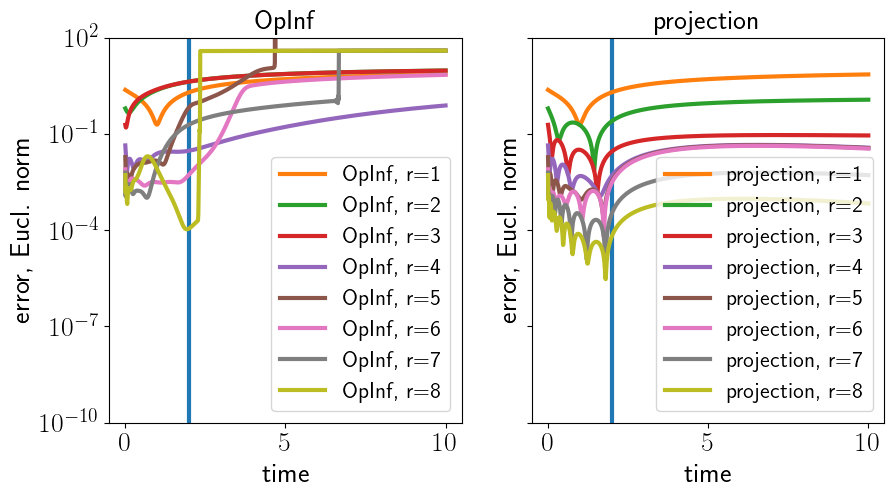

In [9]:
testing.plot_error_comparison_horizontal(errors = errors, 
                              model_indices = [*range(len(names))], 
                              error_indices = [0], 
                              para_index = 0, 
                              final_training_time = 2, 
                              grid_t = grid_t, 
                              names = names)

## The End.

In [10]:
print("Runtime of this notebook: {} min".format((time.time()-tStart_notebook)/60))

Runtime of this notebook: 58.92664630015691 min
